In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats.stats import pearsonr

In [9]:
#Recommendation data
movie_user_preferences={'Jill': {'Avenger: Age of Ultron': 7.0,
'Django Unchained': 6.5,
'Gone Girl': 9.0,
'Kill the Messenger': 8.0},
'Julia': {'Avenger: Age of Ultron': 10.0,
'Django Unchained': 6.0,
'Gone Girl': 6.5,
'Kill the Messenger': 6.0,
'Zoolander': 6.5},
'Max': {'Avenger: Age of Ultron': 7.0,
'Django Unchained': 7.0,
'Gone Girl': 10.0,
'Horrible Bosses 2': 6.0,
'Kill the Messenger': 5.0,
'Zoolander': 10.0},
'Robert': {'Avenger: Age of Ultron': 8.0,
'Django Unchained': 7.0,
'Horrible Bosses 2': 5.0,
'Kill the Messenger': 9.0,
'Zoolander': 9.0},
'Sam': {'Avenger: Age of Ultron': 10.0,
'Django Unchained': 7.5,
'Gone Girl': 6.0,
'Horrible Bosses 2': 3.0,
'Kill the Messenger': 5.5,
'Zoolander': 7.0},
'Toby': {'Avenger: Age of Ultron': 8.5,
'Django Unchained': 9.0,
'Zoolander': 2.0},
'William': {'Avenger: Age of Ultron': 6.0,
'Django Unchained': 8.0,
'Gone Girl': 7.0,
'Horrible Bosses 2': 4.0,
'Kill the Messenger': 6.5,
'Zoolander': 4.0}}
movie_user_preferences['William']['Gone Girl']

7.0

We'll create a DataFrame that contains the user , django , and avenger columns,
where django and avenger contain the ratings given by the user

In [10]:
data = []
for i in movie_user_preferences.keys():
    try:
        data.append( (i
        ,movie_user_preferences[i]['Django Unchained']
        ,movie_user_preferences[i]['Avenger: Age of Ultron']) )
    except:
        pass

df = pd.DataFrame(data=data, columns = ['user','django','avenger'])
df

,user,django,avenger
0,Jill,6.5,7.0
1,Julia,6.0,10.0
2,Max,7.0,7.0
3,Robert,7.0,8.0
4,Sam,7.5,10.0
5,Toby,9.0,8.5
6,William,8.0,6.0


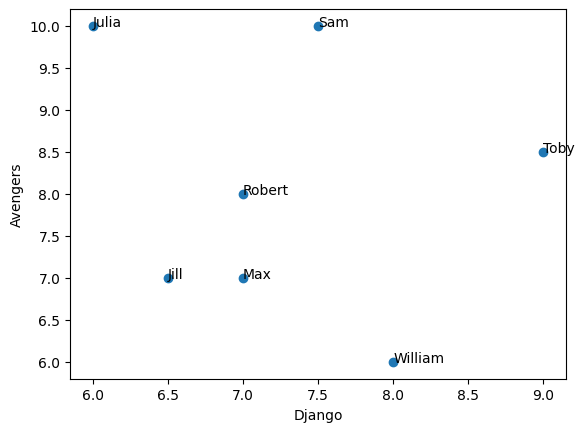

In [11]:
plt.scatter(df.django, df.avenger)
plt.xlabel('Django')
plt.ylabel('Avengers')
for i, txt in enumerate(df.user):
    plt.annotate(txt, (df.django[i], df.avenger[i]))
plt.show()
        

In [15]:
#Euclidean distance between Jill and Toby rating
math.sqrt(pow(8.5-7,2) + pow(9-6.5,2))


2.9154759474226504

In [16]:
#Euclidean distance between Jill and Toby rating
math.sqrt(pow(8-7,2) + pow(7-7,2))


1.0

In [20]:
#Similarity Score based on Euclidean distance between Jill and Toby
1/ (1 + math.sqrt(pow(8.5-7, 2) + pow(9-6.5,2)))

0.2553967929896867

In [21]:
#Similarity Score based on Euclidean distance between Robert and Max
1/(1 + math.sqrt(pow(8-7,2)+pow(7-7,2)) )

0.5

In [26]:
# Returns a distance-based similarity score for person1 and perso
def sim_distance(prefs, person1, person2):
    #Get the list of shared_items
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
    # if they have no ratings in common, return 0
    if len(si)==0: return 0
    # Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item] -
                    prefs[person2][item],2) for item in prefs[person1] if item in prefs[person2]])
    
    return 1/(1+sum_of_squares)

sim_distance(movie_user_preferences,'Sam','Toby')   
                        
                        
                          

0.03278688524590164

In [28]:
#Let's see how Sam and Toby are correlated to each other:
def create_movie_user_df(input_data, user1, user2):
    data = []
    for movie in input_data[user1].keys():
        if movie in input_data[user2].keys():
            try:
                data.append((movie, input_data[user1][movie],
                             input_data[user2][movie]))
            except:
                pass
    return pd.DataFrame(data = data, columns = ["movie", user1, user2])

df = create_movie_user_df(movie_user_preferences, 'Sam','William')
df

,movie,Sam,William
0,Avenger: Age of Ultron,10.0,6.0
1,Django Unchained,7.5,8.0
2,Gone Girl,6.0,7.0
3,Horrible Bosses 2,3.0,4.0
4,Kill the Messenger,5.5,6.5
5,Zoolander,7.0,4.0


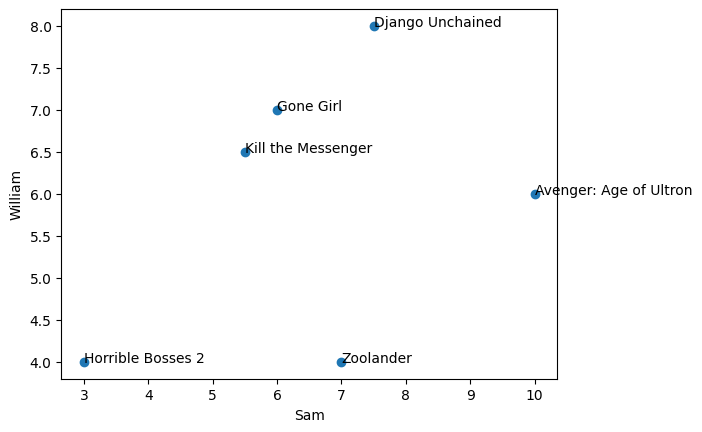

In [29]:
#Once we have created the preceding DataFrame, we will plot the scatter plot as we did earlier:
plt.scatter(df.Sam, df.William)
plt.xlabel('Sam')
plt.ylabel('William')
for i, txt in enumerate(df.movie):
    plt.annotate(txt, (df.Sam[i], df.William[i]))
plt.show()


In [32]:
#Let's compute the Pearson correlation between Sam and William :
pearsonr(df.Sam, df.William)

(0.3706740197017842, 0.4694541326841095)

In [33]:
df = create_movie_user_df(movie_user_preferences,'Sam','Julia')
df

,movie,Sam,Julia
0,Avenger: Age of Ultron,10.0,10.0
1,Django Unchained,7.5,6.0
2,Gone Girl,6.0,6.5
3,Kill the Messenger,5.5,6.0
4,Zoolander,7.0,6.5


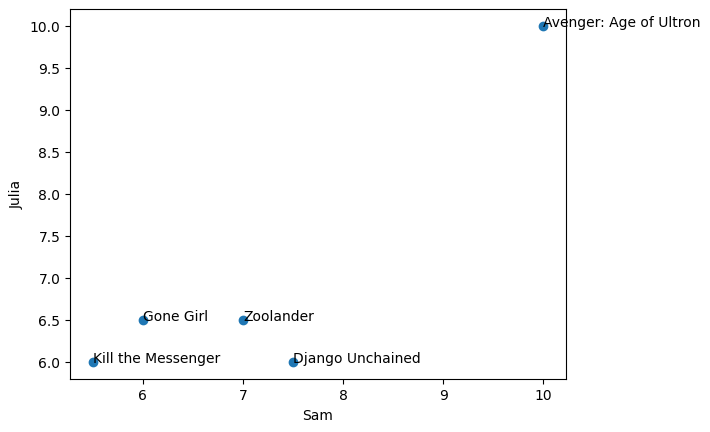

In [35]:
plt.scatter(df.Sam, df.Julia)
plt.xlabel('Sam')
plt.ylabel('Julia')
for i, txt in enumerate(df.movie):
    plt.annotate(txt, (df.Sam[i], df.Julia[i]))
plt.show()


In [36]:
pearsonr(df.Sam,df.Julia)

(0.8828518332602512, 0.047277507003439405)

In [39]:
#We'll now create a function that takes in the data and calculates the Pearson correlation between the two users:

def sim_pearson(prefs, p1, p2):
    #Get the list of mutually reated items
    si={}
    for item in prefs[p1]:
        if item in prefs[p2]: si[item]=1
        
    #Find the number of elements
    n = len(si)
    #if they are no ratings in common, return 0
    if n==0: return 0
    
    #Add up all the preferences
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])

    #Sum up the squares
    sum1Sq = sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq = sum([pow(prefs[p2][it],2) for it in si])
    
    #Sum p the products
    pSum = sum([prefs[p1][it]*prefs[p2][it] for it in si])
    
    #calculate pearson score
    num = pSum-(sum1*sum2/n)
    den = math.sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2, 2)/n))
    
    if den == 0: return 0

    r = num/den
    return r
sim_pearson(movie_user_preferences,'Sam','Julia')
                  

0.8828518332602507

In [40]:
#Ranking the users
def top_matches(prefs, person, n=5, similarity=sim_pearson):
    scores=[(similarity(prefs, person, other), other) for other in prefs if other!=person]
    
    #sort the list so the highest scores appear at the top
    scores.sort()
    scores.reverse()
    return scores[0:n]

top_matches(movie_user_preferences,'Toby', n = 3, similarity = sim_distance)

[(0.10526315789473684, 'Jill'),
 (0.08163265306122448, 'William'),
 (0.03278688524590164, 'Sam')]

In [43]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings

def get_recommendations(prefs, person, similarity=sim_pearson):
    totals={}
    simSums = {}
    for other in prefs:
        #don't compare me to mysqlf
        if other==person: continue
        sim=similarity(prefs, person, other)
        
        #ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
            #only score movies I have not see yet
            if item not in prefs[person] or prefs[person][item]==0:
                #Similarity * Score
                totals.setdefault(item, 0)
                totals[item] += prefs[other][item]*sim
                
                #Sum of similarities
                simSums.setdefault(item,0)
                simSums[item] +=sim
        
        #Create the normalized list
        rankings =[(total/simSums[item],item) for item, total in totals.items()]
        
        #return the sorted list
        rankings.sort()
        rankings.reverse()
        return rankings
get_recommendations(movie_user_preferences,'Toby')

[(6.5, 'Gone Girl'), (6.0, 'Kill the Messenger')]

In [47]:
#Item-based collaborative filtering
def transform_prefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item, {})
            
            #flip item and person
            result[item][person] = prefs[person][item]
    return result
#Now, we would like to find similar movies for each of the movies:
def calculate_similar_items(prefs, n=10):
    # Create a dictionary of items showing which other items they
    # are most similar to.
    result={}
    
    # Invert the preference matrix to be item-centric
    itemPrefs=transform_prefs(prefs)
    c=0
    
    for item in itemPrefs:
        #Status updates for large datasets
        c+=1
        if c%100==0: print('%d/%d' % (c,len(itemPrefs)))
        # Find the most similar items to this one
        scores=top_matches(itemPrefs, item, n=n,similarity=sim_distance)
        result[item]=scores
    return result
itemsim=calculate_similar_items(movie_user_preferences)   
itemsim
    

{'Avenger: Age of Ultron': [(0.034782608695652174, 'Django Unchained'),
  (0.023121387283236993, 'Gone Girl'),
  (0.022988505747126436, 'Kill the Messenger'),
  (0.015625, 'Horrible Bosses 2'),
  (0.012738853503184714, 'Zoolander')],
 'Django Unchained': [(0.05714285714285714, 'Kill the Messenger'),
  (0.05063291139240506, 'Gone Girl'),
  (0.034782608695652174, 'Avenger: Age of Ultron'),
  (0.023668639053254437, 'Horrible Bosses 2'),
  (0.012578616352201259, 'Zoolander')],
 'Gone Girl': [(0.09090909090909091, 'Zoolander'),
  (0.05063291139240506, 'Django Unchained'),
  (0.036036036036036036, 'Kill the Messenger'),
  (0.02857142857142857, 'Horrible Bosses 2'),
  (0.023121387283236993, 'Avenger: Age of Ultron')],
 'Kill the Messenger': [(0.05714285714285714, 'Django Unchained'),
  (0.036036036036036036, 'Gone Girl'),
  (0.03278688524590164, 'Horrible Bosses 2'),
  (0.02877697841726619, 'Zoolander'),
  (0.022988505747126436, 'Avenger: Age of Ultron')],
 'Zoolander': [(0.09090909090909091,

In [49]:
def get_recommendedItems(prefs,itemMatch,user):
    userRatings=prefs[user]
    scores={}
    totalSim={}
    # Loop over items rated by this user
    for (item,rating) in userRatings.items( ):
    # Loop over items similar to this one
        for (similarity,item2) in itemMatch[item]:
            # Ignore if this user has already rated this item
            if item2 in userRatings: continue
            # Weighted sum of rating times similarity
            scores.setdefault(item2,0)
            scores[item2]+=similarity*rating
            # Sum of all the similarities
            totalSim.setdefault(item2,0)
            totalSim[item2]+=similarity
        # Divide each total score by total weighting to get an average
        rankings=[(score/totalSim[item],item) for
        item,score in scores.items( )]
        # Return the rankings from highest to lowest
        rankings.sort( )
        rankings.reverse( )
        return rankings
    # Divide each total score by total weighting to get an average
    rankings=[(score/totalSim[item],item) for
    item,score in scores.items( )]
    # Return the rankings from highest to lowest
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [50]:
get_recommendedItems(movie_user_preferences, itemsim,'Toby')

[(8.5, 'Kill the Messenger'), (8.5, 'Horrible Bosses 2'), (8.5, 'Gone Girl')]